In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/csv_result-ECG5000_TEST.csv')
df.head()
df.tail()
StandardScaler = StandardScaler()
df = StandardScaler.fit_transform(df)
x_train, x_test = train_test_split(df, test_size=0.2)

encoder = models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu')

])

decoder = models.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(x_train.shape[1], activation='linear')
])

autoencoder = models.Sequential([
    encoder,
    decoder
])

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train, x_train, validation_data=(x_test,x_test), epochs=10 )

y_pred = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - y_pred,2), axis=1)

threshold = np.percentile(mse, 95)
anomalies = mse > threshold
num_anomalies = np.sum(anomalies)
print("Number of anomalies", num_anomalies)

plt.plot(mse, marker='o',markersize='3',linestyle=' ',label='MSE')
plt.axhline(threshold, linestyle='--', color='r', label='Anomaly threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.legend()
plt.show()


plt.figure(figsize=(12,6))
plt.plot(x_test[0], label='Original ECG')
plt.plot(y_pred[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

sns.heatmap(confusion_matrix(anomalies,anomalies),annot=True, fmt='d')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("confusion matrix")
plt.show()

In [ ]:
# b. upload access the dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,att1,att2,att3,att4,att5,att6,att7,att8,att9,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,Unnamed: 141
4495,4496,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,4
4496,4497,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,2
4497,4498,-1.351779,-2.209006,-2.520225,-3.061475,-3.065141,-3.030739,-2.622720,-2.044092,-1.295874,...,-1.512234,-2.076075,-2.586042,-3.322799,-3.627311,-3.437038,-2.260023,-1.577823,-0.684531,2
4498,4499,-1.124432,-1.905039,-2.192707,-2.904320,-2.900722,-2.761252,-2.569705,-2.043893,-1.490538,...,-2.821782,-3.268355,-3.634981,-3.168765,-2.245878,-1.262260,-0.443307,-0.559769,0.108568,2
4499,4500,0.728813,0.192597,-0.733884,-1.779456,-2.345908,-2.977565,-3.380053,-3.417164,-3.030925,...,1.267275,1.678989,2.483389,2.569073,2.122891,1.753963,1.538975,1.713781,1.309382,2


In [ ]:
# c. Encoder converts it into latent representation

In [ ]:
encoder = models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu')

])


In [ ]:
# d. Decoder networks convert it back to the original input

In [ ]:
decoder = models.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(x_train.shape[1], activation='linear')
])

In [ ]:
autoencoder = models.Sequential([
    encoder,
    decoder
])

In [ ]:
# e. Compile the models with Optimizer, Loss, and Evaluation Metrics

In [ ]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train, x_train, validation_data=(x_test,x_test), epochs=10 )

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.9328 - val_loss: 0.5301
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4232 - val_loss: 0.3560
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3274 - val_loss: 0.3337
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3052 - val_loss: 0.2794
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2528 - val_loss: 0.2377
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2229 - val_loss: 0.2225
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2127 - val_loss: 0.2132
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1871 - val_loss: 0.2040
Epoch 9/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1917 - val_loss: 0.1969
Epoch 10/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1781 - val_loss: 0.1887


In [ ]:
y_pred = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - y_pred,2), axis=1)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
threshold = np.percentile(mse, 95)
anomalies = mse > threshold
num_anomalies = np.sum(anomalies)
print("Number of anomalies", num_anomalies)

Number of anomalies 45


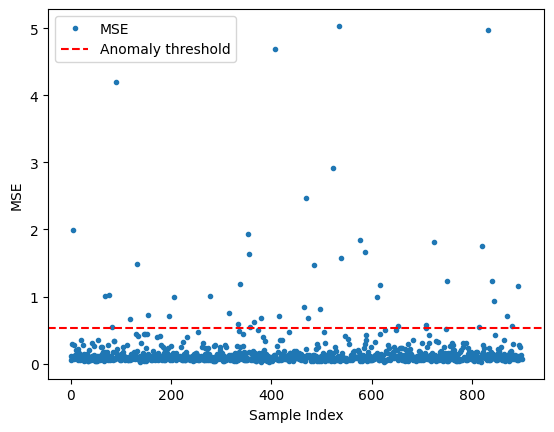

In [ ]:
plt.plot(mse, marker='o',markersize='3',linestyle=' ',label='MSE')
plt.axhline(threshold, linestyle='--', color='r', label='Anomaly threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.legend()
plt.show()

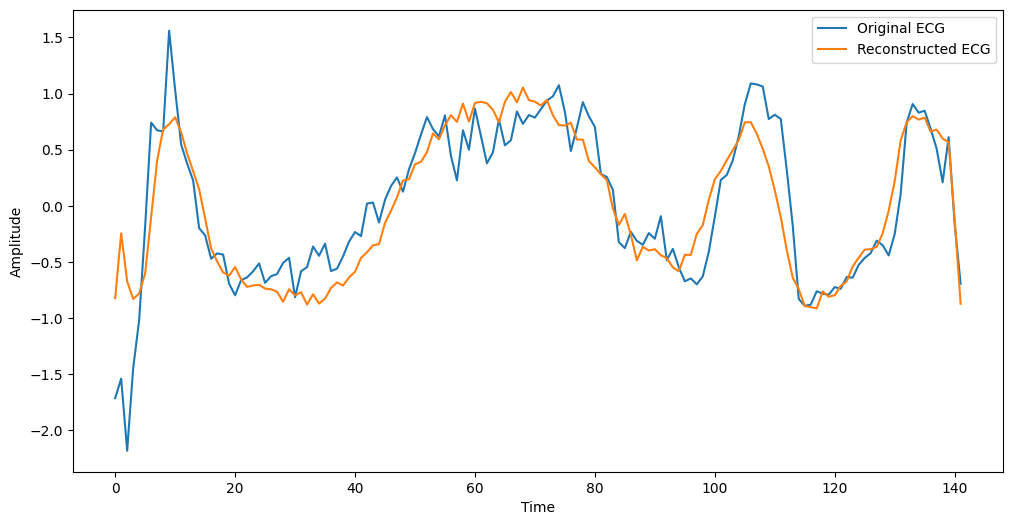

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(x_test[0], label='Original ECG')
plt.plot(y_pred[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

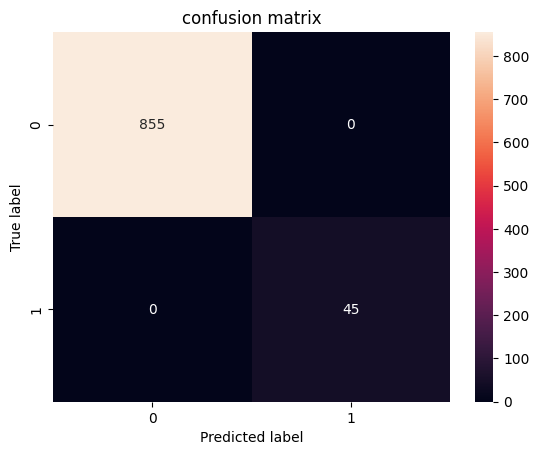

In [ ]:
sns.heatmap(confusion_matrix(anomalies,anomalies),annot=True, fmt='d')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("confusion matrix")
plt.show()